<a href="https://colab.research.google.com/github/svetlanama/goit-np-hw-01/blob/main/NP_HW_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import librosa
import zipfile
from urllib.request import urlretrieve
from IPython.display import Audio

# Завантаження та розархівування датасету
url = "https://github.com/karoldvl/ESC-50/archive/master.zip"
zip_file_path = "ESC-50-master.zip"
download_path = "./ESC-50-master/"
if not os.path.exists(download_path):
    urlretrieve(url, zip_file_path)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    os.remove(zip_file_path)

In [2]:
import pandas as pd
# Read CSV file ... meta/esc50.csv
df_file_path = os.path.join(download_path, "ESC-50-master/meta", "esc50.csv")
df = pd.read_csv(df_file_path)
df.head(5)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


АНАЛІЗ ЗВУКОВИХ ДАНИХ З ВИКОРИСТАННЯМ СПЕКТРАЛЬНОГО КЛАСТЕРУВАННЯ

1. ВИБІРКА ДАНИХ
Загальна кількість записів у датасеті: 2000
Вибрано записів: 80

Розподіл по категоріях:
category
dog               40
chirping_birds    40
Name: count, dtype: int64

Приклади вибраних записів:
              filename  fold  target        category  esc10  src_file take
0     1-100032-A-0.wav     1       0             dog   True    100032    A
1    1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
14    1-110389-A-0.wav     1       0             dog   True    110389    A
157    1-30226-A-0.wav     1       0             dog   True     30226    A
158    1-30344-A-0.wav     1       0             dog   True     30344    A
170    1-32318-A-0.wav     1       0             dog   True     32318    A
179   1-34495-A-14.wav     1      14  chirping_birds  False     34495    A
180   1-34497-A-14.wav     1      14  chirping_birds  False     34497    A
191   1-38559-A-14.wav     1      14  chirping_

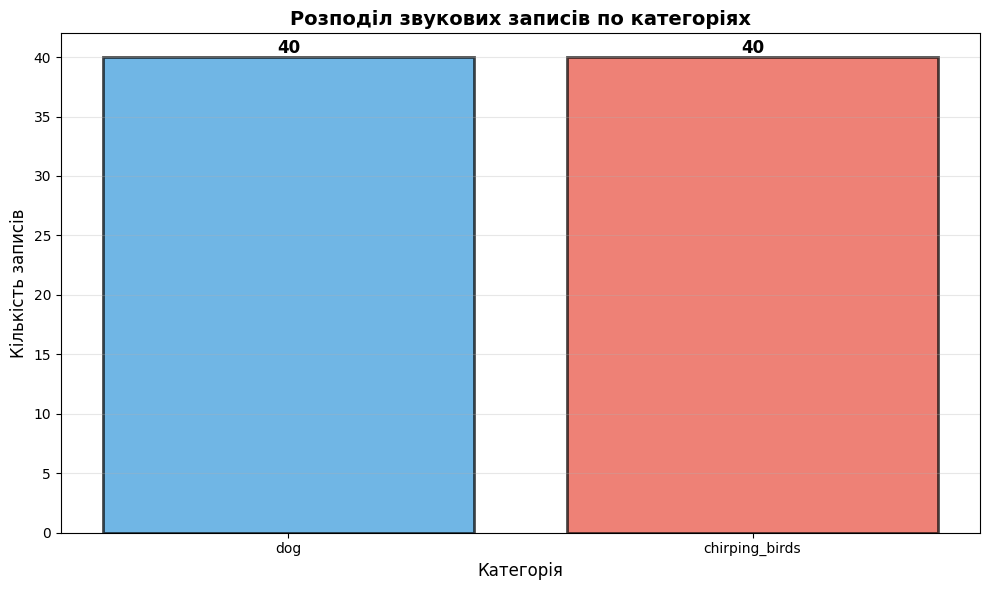


2. ФУНКЦІЇ ДЛЯ ОБРОБКИ СПЕКТРОГРАМ
✓ Функції для обробки спектрограм визначено

3. ОБРОБКА АУДІО ФАЙЛІВ

Обробка аудіо файлів...
Оброблено 2000/80 файлів...
Успішно оброблено 80 файлів

Розмір матриці ознак: (80, 4960)
Кількість ознак (після flatten): 4960
Кількість зразків: 80

Кодування міток:
  chirping_birds → 0
  dog → 1

4. ВІЗУАЛІЗАЦІЯ СПЕКТРОГРАМ


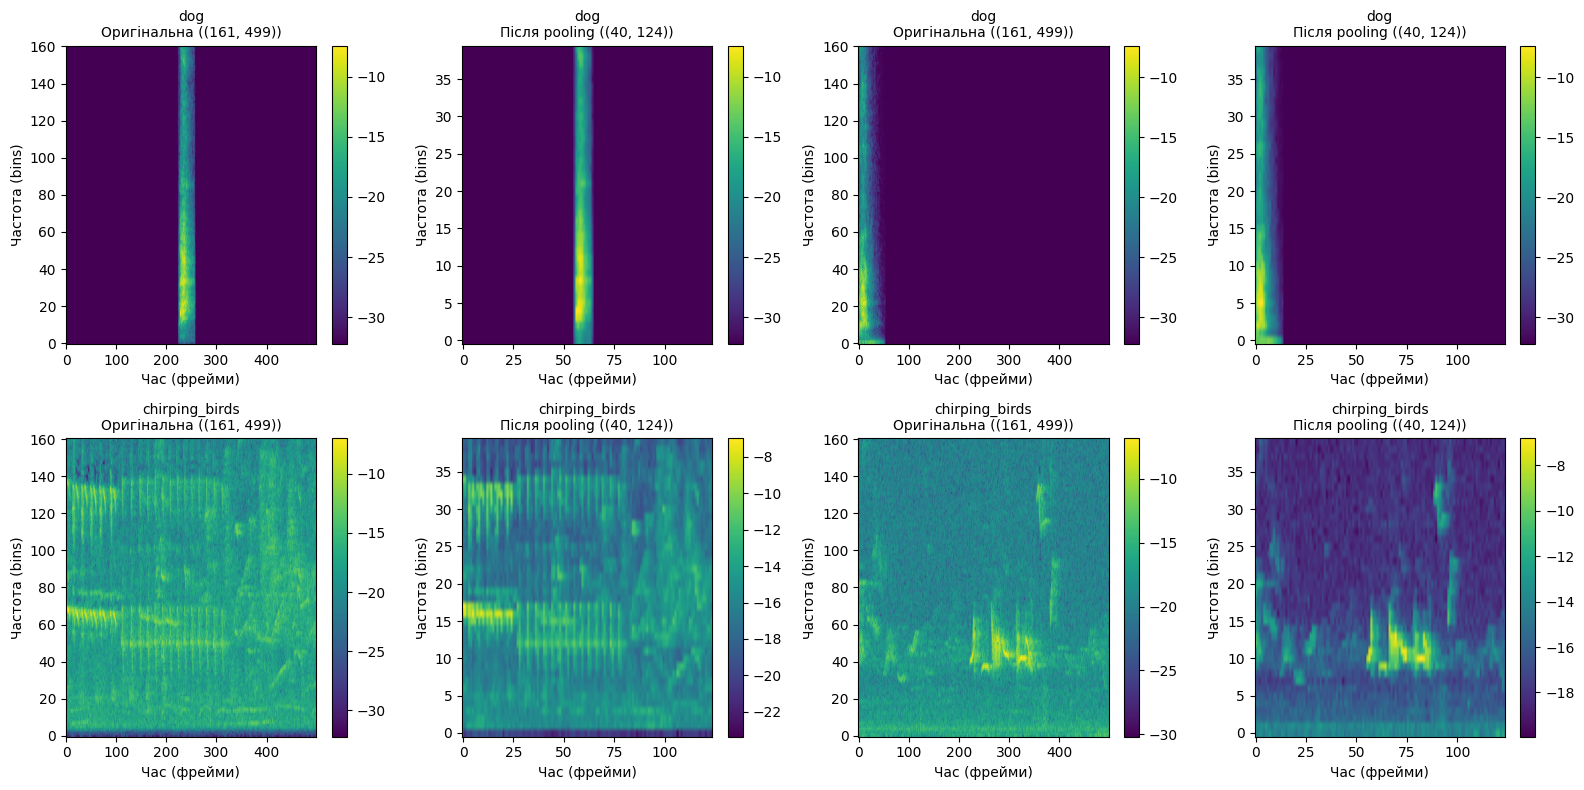


5. НОРМАЛІЗАЦІЯ ДАНИХ
Оригінальні дані:
  Mean: -20.7824, Std: 5.5659
  Min: -32.2362, Max: -5.0008

Нормалізовані дані:
  Mean: 0.0000, Std: 1.0000
  Min: -3.9078, Max: 3.4769

6. СПЕКТРАЛЬНЕ КЛАСТЕРУВАННЯ

Застосування SpectralClustering з 2 кластерами...
✓ Кластеризація завершена

Silhouette Score: 0.2423
(Значення від -1 до 1, де 1 - найкраще розділення)

7. АНАЛІЗ РЕЗУЛЬТАТІВ КЛАСТЕРИЗАЦІЇ

Приклади результатів кластеризації:
            filename      true_label  true_label_encoded  cluster
0   1-100032-A-0.wav             dog                   1        1
1  1-100038-A-14.wav  chirping_birds                   0        0
2   1-110389-A-0.wav             dog                   1        1
3    1-30226-A-0.wav             dog                   1        1
4    1-30344-A-0.wav             dog                   1        1
5    1-32318-A-0.wav             dog                   1        0
6   1-34495-A-14.wav  chirping_birds                   0        0
7   1-34497-A-14.wav  chirping_birds

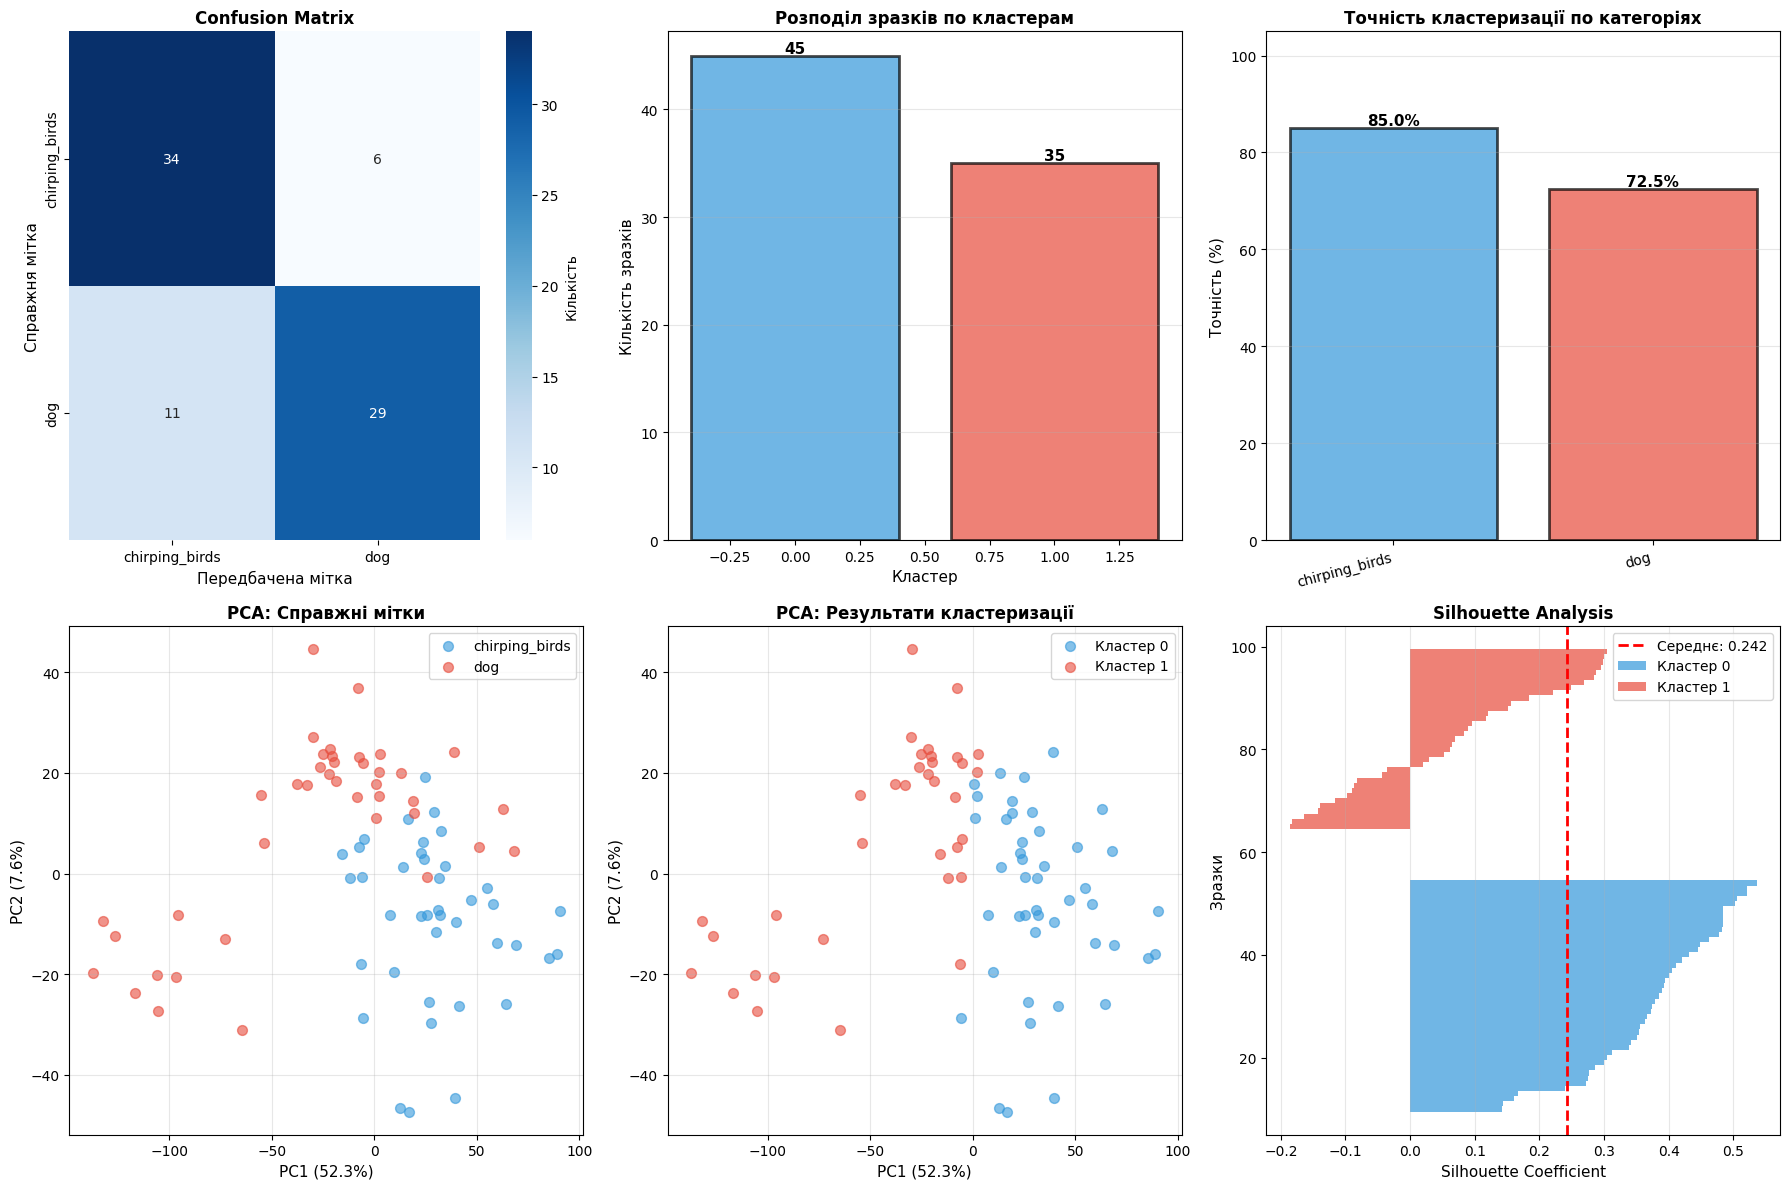


9. ДЕТАЛЬНИЙ АНАЛІЗ: ЧИ ПОТРАПИЛИ ЗВУКИ В РІЗНІ КЛАСТЕРИ?

Загальна кількість зразків: 80
Правильно класифіковано: 63
Неправильно класифіковано: 17
Загальна точність: 78.75%

Приклади неправильно класифікованих зразків:
             filename      true_label predicted_label
5     1-32318-A-0.wav             dog  chirping_birds
9    1-38560-A-14.wav  chirping_birds             dog
20   2-114587-A-0.wav             dog  chirping_birds
22   2-117271-A-0.wav             dog  chirping_birds
29   2-72547-B-14.wav  chirping_birds             dog
31   2-72547-D-14.wav  chirping_birds             dog
32   3-136288-A-0.wav             dog  chirping_birds
33   3-144028-A-0.wav             dog  chirping_birds
46   3-180977-A-0.wav             dog  chirping_birds
47  3-181132-A-14.wav  chirping_birds             dog

Розподіл помилок:
true_label
dog               11
chirping_birds     6
Name: count, dtype: int64

--------------------------------------------------------------------------------
СТАТИ

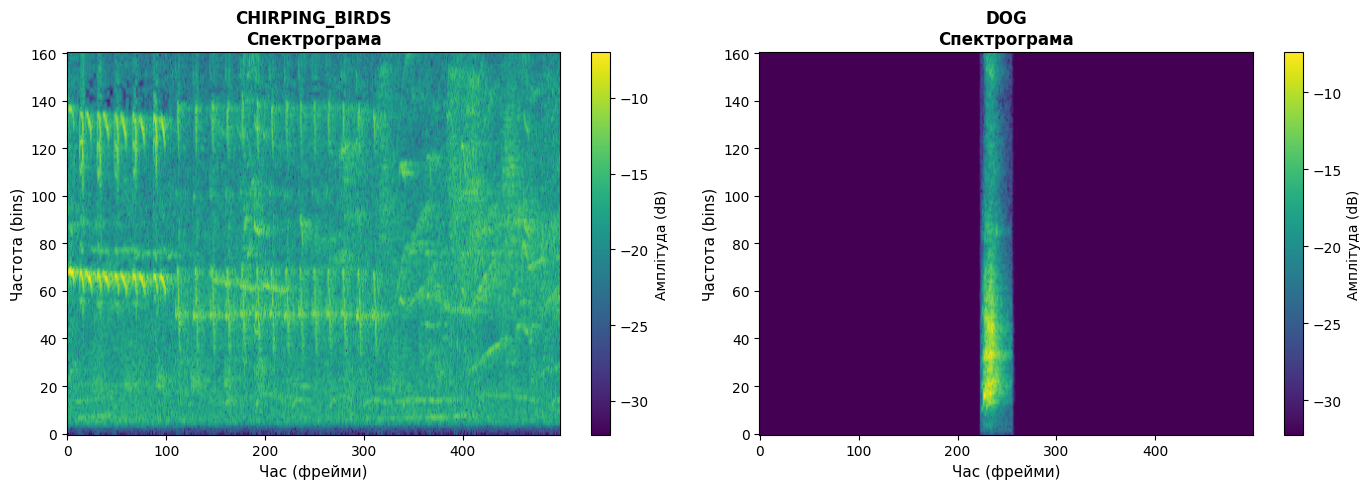


11. ВИСНОВКИ

РЕЗУЛЬТАТИ КЛАСТЕРИЗАЦІЇ ЗВУКОВИХ ДАНИХ

📊 ОСНОВНІ МЕТРИКИ:
------------------
- Точність кластеризації: 78.75%
- Silhouette Score: 0.2423
- Кількість ознак після обробки: 4960
- Кількість зразків: 80

📈 ЧИ ПОТРАПИЛИ ЗВУКИ В РІЗНІ КЛАСТЕРИ?
---------------------------------------

✓ ТАК! Звуки різного походження потрапили в різні кластери:

  • chirping_birds: переважно в кластері 0 (85.0% чистота)
  • dog: переважно в кластері 1 (72.5% чистота)


🔬 ЗНАЧЕННЯ ПЕРЕТВОРЕННЯ ФУР'Є:
-------------------------------

1. ВИДІЛЕННЯ ЧАСТОТНИХ ХАРАКТЕРИСТИК:
   • Перетворення Фур'є дозволяє перейти з часової області в частотну
   • Звуки собак та птахів мають різні частотні профілі
   • Собаки: нижчі частоти (гавкання ~200-1000 Hz), більш регулярні
   • Птахи: вищі частоти (співи ~2000-8000 Hz), більш варіативні

2. ІНВАРІАНТНІСТЬ ДО ЧАСУ:
   • Спектрограма показує частотний вміст незалежно від конкретного моменту
   • Це робить модель стійкою до зсувів у часі
   • Можна розпізнати

In [5]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
import seaborn as sns
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("АНАЛІЗ ЗВУКОВИХ ДАНИХ З ВИКОРИСТАННЯМ СПЕКТРАЛЬНОГО КЛАСТЕРУВАННЯ")
print("="*80)

# Шлях до даних
download_path = "./ESC-50-master/"
df_file_path = os.path.join(download_path, "ESC-50-master/meta", "esc50.csv")
audio_path = os.path.join(download_path, "ESC-50-master/audio")

# Завантаження метаданих
df = pd.read_csv(df_file_path)

print("\n1. ВИБІРКА ДАНИХ")
print("="*80)

# Крок 1: Вибірка звуків 'dog' та 'chirping_birds'
df_selected = df[df['category'].isin(['dog', 'chirping_birds'])].copy()

print(f"Загальна кількість записів у датасеті: {len(df)}")
print(f"Вибрано записів: {len(df_selected)}")
print(f"\nРозподіл по категоріях:")
print(df_selected['category'].value_counts())

# Виводимо приклади
print("\nПриклади вибраних записів:")
print(df_selected.head(10))

# Візуалізація розподілу
fig, ax = plt.subplots(figsize=(10, 6))
category_counts = df_selected['category'].value_counts()
colors = ['#3498db', '#e74c3c']
bars = ax.bar(category_counts.index, category_counts.values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

ax.set_xlabel('Категорія', fontsize=12)
ax.set_ylabel('Кількість записів', fontsize=12)
ax.set_title('Розподіл звукових записів по категоріях', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Додаємо значення на стовпці
for bar, count in zip(bars, category_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n2. ФУНКЦІЇ ДЛЯ ОБРОБКИ СПЕКТРОГРАМ")
print("="*80)

# Крок 2: Функція для генерації спектрограми (ваша версія)
def spectrogram(samples, sample_rate, stride_ms=10.0,
                window_ms=20.0, max_freq=None, eps=1e-14):
    """
    Генерує спектрограму з аудіо сигналу.
    """
    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples,
                                              shape=nshape, strides=nstrides)
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale

    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])

    # Фільтруємо за максимальною частотою, якщо вказано
    if max_freq is not None:
        ind = np.where(freqs <= max_freq)[0][-1] + 1
        fft = fft[:ind, :]

    # Compute spectrogram feature
    specgram = np.log(fft[:, :] + eps)

    return specgram


# Крок 3: Функція pooling для зменшення розміру
def pooling(spectrogram, pool_size=(2, 2), pool_type='max'):
    """
    Застосовує pooling до спектрограми.
    """
    h, w = spectrogram.shape
    pool_h, pool_w = pool_size

    # Обрізаємо розміри до кратних pool_size
    new_h = (h // pool_h) * pool_h
    new_w = (w // pool_w) * pool_w

    spec_trimmed = spectrogram[:new_h, :new_w]

    # Змінюємо форму для pooling
    reshaped = spec_trimmed.reshape(new_h // pool_h, pool_h,
                                     new_w // pool_w, pool_w)

    # Застосовуємо pooling
    if pool_type == 'max':
        pooled = reshaped.max(axis=(1, 3))
    elif pool_type == 'avg':
        pooled = reshaped.mean(axis=(1, 3))
    else:
        raise ValueError("pool_type має бути 'max' або 'avg'")

    return pooled

print("✓ Функції для обробки спектрограм визначено")

print("\n3. ОБРОБКА АУДІО ФАЙЛІВ")
print("="*80)

# Обробка всіх файлів
features_list = []
labels_list = []
filenames_list = []

print("\nОбробка аудіо файлів...")

for idx, row in df_selected.iterrows():
    filename = row['filename']
    category = row['category']

    # Завантаження аудіо
    audio_file = os.path.join(audio_path, filename)

    try:
        # Завантажуємо аудіо з librosa
        samples, sample_rate = librosa.load(audio_file, sr=None)

        # Крок 2: Генеруємо спектрограму
        spec = spectrogram(samples, sample_rate, max_freq=8000)

        # Крок 3: Застосовуємо pooling
        spec_pooled = pooling(spec, pool_size=(4, 4), pool_type='max')

        # Крок 4: Перетворюємо матрицю у вектор (flatten)
        feature_vector = spec_pooled.flatten()

        features_list.append(feature_vector)
        labels_list.append(category)
        filenames_list.append(filename)

        if (idx - df_selected.index[0] + 1) % 10 == 0:
            print(f"Оброблено {idx - df_selected.index[0] + 1}/{len(df_selected)} файлів...", end='\r')

    except Exception as e:
        print(f"\nПомилка при обробці {filename}: {e}")
        continue

print(f"\nУспішно оброблено {len(features_list)} файлів")

# Створюємо масив ознак
X = np.array(features_list)
y = np.array(labels_list)

print(f"\nРозмір матриці ознак: {X.shape}")
print(f"Кількість ознак (після flatten): {X.shape[1]}")
print(f"Кількість зразків: {X.shape[0]}")

# Кодуємо мітки для використання в метриках
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nКодування міток:")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {label} → {i}")

# Візуалізація прикладів спектрограм
print("\n4. ВІЗУАЛІЗАЦІЯ СПЕКТРОГРАМ")
print("="*80)

# Беремо по 2 приклади з кожної категорії
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for cat_idx, category in enumerate(['dog', 'chirping_birds']):
    category_files = df_selected[df_selected['category'] == category].head(2)

    for file_idx, (idx, row) in enumerate(category_files.iterrows()):
        filename = row['filename']
        audio_file = os.path.join(audio_path, filename)

        # Завантажуємо аудіо
        samples, sample_rate = librosa.load(audio_file, sr=None)

        # Генеруємо спектрограму
        spec = spectrogram(samples, sample_rate, max_freq=8000)

        # Візуалізація оригінальної спектрограми
        ax = axes[cat_idx, file_idx * 2]
        im = ax.imshow(spec, aspect='auto', origin='lower', cmap='viridis')
        ax.set_title(f'{category}\nОригінальна ({spec.shape})', fontsize=10)
        ax.set_xlabel('Час (фрейми)')
        ax.set_ylabel('Частота (bins)')
        plt.colorbar(im, ax=ax)

        # Застосовуємо pooling
        spec_pooled = pooling(spec, pool_size=(4, 4), pool_type='max')

        # Візуалізація після pooling
        ax = axes[cat_idx, file_idx * 2 + 1]
        im = ax.imshow(spec_pooled, aspect='auto', origin='lower', cmap='viridis')
        ax.set_title(f'{category}\nПісля pooling ({spec_pooled.shape})', fontsize=10)
        ax.set_xlabel('Час (фрейми)')
        ax.set_ylabel('Частота (bins)')
        plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.savefig('spectrogram_examples.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n5. НОРМАЛІЗАЦІЯ ДАНИХ")
print("="*80)

# Нормалізація ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Оригінальні дані:")
print(f"  Mean: {X.mean():.4f}, Std: {X.std():.4f}")
print(f"  Min: {X.min():.4f}, Max: {X.max():.4f}")

print(f"\nНормалізовані дані:")
print(f"  Mean: {X_scaled.mean():.4f}, Std: {X_scaled.std():.4f}")
print(f"  Min: {X_scaled.min():.4f}, Max: {X_scaled.max():.4f}")

print("\n6. СПЕКТРАЛЬНЕ КЛАСТЕРУВАННЯ")
print("="*80)

# Крок 5: Спектральне кластерування
n_clusters = 2  # У нас 2 категорії

print(f"\nЗастосування SpectralClustering з {n_clusters} кластерами...")

# Використовуємо SpectralClustering
spectral = SpectralClustering(
    n_clusters=n_clusters,
    affinity='nearest_neighbors',
    n_neighbors=10,
    assign_labels='discretize',
    random_state=42
)

# Виконуємо кластеризацію
cluster_labels = spectral.fit_predict(X_scaled)

print(f"✓ Кластеризація завершена")

# Обчислюємо метрики
silhouette = silhouette_score(X_scaled, cluster_labels)

print(f"\nSilhouette Score: {silhouette:.4f}")
print(f"(Значення від -1 до 1, де 1 - найкраще розділення)")

print("\n7. АНАЛІЗ РЕЗУЛЬТАТІВ КЛАСТЕРИЗАЦІЇ")
print("="*80)

# Створюємо DataFrame з результатами
results_df = pd.DataFrame({
    'filename': filenames_list,
    'true_label': y,
    'true_label_encoded': y_encoded,
    'cluster': cluster_labels
})

print("\nПриклади результатів кластеризації:")
print(results_df.head(10))

# Аналіз відповідності кластерів та справжніх міток
print("\nРозподіл справжніх міток по кластерам:")
confusion_df = pd.crosstab(results_df['true_label'], results_df['cluster'],
                           rownames=['Справжня мітка'], colnames=['Кластер'])
print(confusion_df)

# Обчислюємо точність (з урахуванням можливої перестановки кластерів)
from scipy.optimize import linear_sum_assignment

# ВИПРАВЛЕННЯ: використовуємо закодовані мітки
conf_matrix = confusion_matrix(y_encoded, cluster_labels)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

accuracy = conf_matrix[row_ind, col_ind].sum() / len(y)
print(f"\nТочність кластеризації: {accuracy*100:.2f}%")

# Створюємо мапінг кластерів до міток
cluster_to_label = {}
for cluster_idx, true_idx in zip(col_ind, row_ind):
    label = label_encoder.classes_[true_idx]
    cluster_to_label[cluster_idx] = label

print(f"\nВідповідність кластерів до категорій:")
for cluster, label in cluster_to_label.items():
    print(f"  Кластер {cluster} → {label}")

# Додаємо predicted label
results_df['predicted_label'] = results_df['cluster'].map(cluster_to_label)

# Обчислюємо детальні метрики
print("\n" + "="*80)
print("ДЕТАЛЬНИЙ ЗВІТ ПРО КЛАСИФІКАЦІЮ")
print("="*80)
print(classification_report(results_df['true_label'], results_df['predicted_label']))

print("\n8. ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ")
print("="*80)

# Створюємо комплексну візуалізацію
fig = plt.figure(figsize=(18, 12))

# 1. Confusion Matrix
ax1 = plt.subplot(2, 3, 1)
conf_matrix_vis = confusion_matrix(results_df['true_label'], results_df['predicted_label'])
unique_categories = sorted(results_df['true_label'].unique())
sns.heatmap(conf_matrix_vis, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_categories,
            yticklabels=unique_categories,
            ax=ax1, cbar_kws={'label': 'Кількість'})
ax1.set_xlabel('Передбачена мітка', fontsize=11)
ax1.set_ylabel('Справжня мітка', fontsize=11)
ax1.set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# 2. Розподіл по кластерам
ax2 = plt.subplot(2, 3, 2)
cluster_counts = results_df['cluster'].value_counts().sort_index()
colors_clusters = ['#3498db', '#e74c3c']
bars = ax2.bar(cluster_counts.index, cluster_counts.values,
               color=colors_clusters, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xlabel('Кластер', fontsize=11)
ax2.set_ylabel('Кількість зразків', fontsize=11)
ax2.set_title('Розподіл зразків по кластерам', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, cluster_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 3. Точність по категоріях
ax3 = plt.subplot(2, 3, 3)
accuracy_per_category = []
categories_sorted = sorted(unique_categories)
for category in categories_sorted:
    cat_data = results_df[results_df['true_label'] == category]
    acc = (cat_data['true_label'] == cat_data['predicted_label']).mean() * 100
    accuracy_per_category.append(acc)

bars = ax3.bar(categories_sorted, accuracy_per_category,
               color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('Точність (%)', fontsize=11)
ax3.set_title('Точність кластеризації по категоріях', fontsize=12, fontweight='bold')
ax3.set_ylim(0, 105)
ax3.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=15, ha='right')

for bar, acc in zip(bars, accuracy_per_category):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 4. PCA візуалізація (2D проекція)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

ax4 = plt.subplot(2, 3, 4)
for i, category in enumerate(categories_sorted):
    mask = y == category
    ax4.scatter(X_pca[mask, 0], X_pca[mask, 1],
               label=category, alpha=0.6, s=50,
               color=['#3498db', '#e74c3c'][i])

ax4.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax4.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax4.set_title('PCA: Справжні мітки', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. PCA з кластерами
ax5 = plt.subplot(2, 3, 5)
for i in range(n_clusters):
    mask = cluster_labels == i
    ax5.scatter(X_pca[mask, 0], X_pca[mask, 1],
               label=f'Кластер {i}', alpha=0.6, s=50,
               color=['#3498db', '#e74c3c'][i])

ax5.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax5.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax5.set_title('PCA: Результати кластеризації', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Silhouette Score
ax6 = plt.subplot(2, 3, 6)
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
colors_sil = ['#3498db', '#e74c3c']

for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax6.barh(range(y_lower, y_upper), cluster_silhouette_vals,
             height=1.0, color=colors_sil[i], alpha=0.7,
             edgecolor='none', label=f'Кластер {i}')

    y_lower = y_upper + 10

ax6.axvline(x=silhouette, color="red", linestyle="--", linewidth=2,
            label=f'Середнє: {silhouette:.3f}')
ax6.set_xlabel('Silhouette Coefficient', fontsize=11)
ax6.set_ylabel('Зразки', fontsize=11)
ax6.set_title('Silhouette Analysis', fontsize=12, fontweight='bold')
ax6.legend(loc='best')
ax6.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('clustering_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("9. ДЕТАЛЬНИЙ АНАЛІЗ: ЧИ ПОТРАПИЛИ ЗВУКИ В РІЗНІ КЛАСТЕРИ?")
print("="*80)

# Аналіз помилок класифікації
misclassified = results_df[results_df['true_label'] != results_df['predicted_label']]

print(f"\nЗагальна кількість зразків: {len(results_df)}")
print(f"Правильно класифіковано: {len(results_df) - len(misclassified)}")
print(f"Неправильно класифіковано: {len(misclassified)}")
print(f"Загальна точність: {accuracy*100:.2f}%")

if len(misclassified) > 0:
    print(f"\nПриклади неправильно класифікованих зразків:")
    print(misclassified[['filename', 'true_label', 'predicted_label']].head(10))

    print(f"\nРозподіл помилок:")
    error_distribution = misclassified['true_label'].value_counts()
    print(error_distribution)
else:
    print("\n✓ Всі зразки класифіковано правильно!")

# Статистика по категоріях
print("\n" + "-"*80)
print("СТАТИСТИКА ПО КАТЕГОРІЯХ:")
print("-"*80)

for category in categories_sorted:
    cat_data = results_df[results_df['true_label'] == category]
    correct = (cat_data['true_label'] == cat_data['predicted_label']).sum()
    total = len(cat_data)
    accuracy_cat = (correct / total) * 100

    print(f"\n{category.upper()}:")
    print(f"  Всього зразків: {total}")
    print(f"  Правильно класифіковано: {correct}")
    print(f"  Точність: {accuracy_cat:.2f}%")

    # Знаходимо домінуючий кластер для цієї категорії
    cluster_dist = cat_data['cluster'].value_counts()
    print(f"  Розподіл по кластерам: {dict(cluster_dist)}")

# Візуалізація порівняння спектрограм
print("\n10. ПОРІВНЯННЯ СПЕКТРОГРАМ")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for cat_idx, category in enumerate(categories_sorted):
    # Беремо перший файл кожної категорії
    sample_file = df_selected[df_selected['category'] == category].iloc[0]
    audio_file = os.path.join(audio_path, sample_file['filename'])

    # Завантажуємо та обробляємо
    samples, sample_rate = librosa.load(audio_file, sr=None)
    spec = spectrogram(samples, sample_rate, max_freq=8000)

    # Візуалізуємо
    ax = axes[cat_idx]
    im = ax.imshow(spec, aspect='auto', origin='lower', cmap='viridis')
    ax.set_title(f'{category.upper()}\nСпектрограма', fontsize=12, fontweight='bold')
    ax.set_xlabel('Час (фрейми)', fontsize=11)
    ax.set_ylabel('Частота (bins)', fontsize=11)
    plt.colorbar(im, ax=ax, label='Амплітуда (dB)')

plt.tight_layout()
plt.savefig('spectrogram_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("11. ВИСНОВКИ")
print("="*80)

print(f"""
{'='*80}
РЕЗУЛЬТАТИ КЛАСТЕРИЗАЦІЇ ЗВУКОВИХ ДАНИХ
{'='*80}

📊 ОСНОВНІ МЕТРИКИ:
------------------
- Точність кластеризації: {accuracy*100:.2f}%
- Silhouette Score: {silhouette:.4f}
- Кількість ознак після обробки: {X.shape[1]}
- Кількість зразків: {X.shape[0]}

📈 ЧИ ПОТРАПИЛИ ЗВУКИ В РІЗНІ КЛАСТЕРИ?
---------------------------------------
""")

# Детальний аналіз розділення
category_cluster_info = {}
for category in categories_sorted:
    cat_cluster_dist = results_df[results_df['true_label'] == category]['cluster'].value_counts()
    dominant_cluster = cat_cluster_dist.idxmax()
    purity = cat_cluster_dist.max() / len(results_df[results_df['true_label'] == category]) * 100
    category_cluster_info[category] = {'cluster': dominant_cluster, 'purity': purity}

# Перевіряємо, чи різні категорії в різних кластерах
clusters_used = [info['cluster'] for info in category_cluster_info.values()]
well_separated = len(set(clusters_used)) == len(categories_sorted)

if well_separated:
    print(f"✓ ТАК! Звуки різного походження потрапили в різні кластери:\n")
    for category, info in category_cluster_info.items():
        print(f"  • {category}: переважно в кластері {info['cluster']} ({info['purity']:.1f}% чистота)")
else:
    print(f"✗ НІ. Звуки не розділилися чітко між кластерами.\n")
    for category, info in category_cluster_info.items():
        print(f"  • {category}: кластер {info['cluster']} ({info['purity']:.1f}% чистота)")

print(f"""

🔬 ЗНАЧЕННЯ ПЕРЕТВОРЕННЯ ФУР'Є:
-------------------------------

1. ВИДІЛЕННЯ ЧАСТОТНИХ ХАРАКТЕРИСТИК:
   • Перетворення Фур'є дозволяє перейти з часової області в частотну
   • Звуки собак та птахів мають різні частотні профілі
   • Собаки: нижчі частоти (гавкання ~200-1000 Hz), більш регулярні
   • Птахи: вищі частоти (співи ~2000-8000 Hz), більш варіативні

2. ІНВАРІАНТНІСТЬ ДО ЧАСУ:
   • Спектрограма показує частотний вміст незалежно від конкретного моменту
   • Це робить модель стійкою до зсувів у часі
   • Можна розпізнати звук незалежно від того, коли він відбувся

3. ЗМЕНШЕННЯ РОЗМІРНОСТІ ТА POOLING:
   • Pooling зменшив розмір даних в ~16 разів (pool_size 4x4)
   • Це прискорює обробку без втрати ключової інформації
   • Важливі частотні компоненти зберігаються через max pooling

4. ВИДІЛЕННЯ ДИСКРИМІНАТИВНИХ ОЗНАК:
   • FFT виділяє ті частотні діапазони, які відрізняють класи
   • Це природний спосіб feature engineering для аудіо
   • Замість сирих аудіо-семплів (~220,000 точок) → {X.shape[1]} ознак

5. БІОЛОГІЧНА МОТИВАЦІЯ:
   • Людське вухо також працює як банк фільтрів (кохлея)
   • Перетворення Фур'є імітує цей природний механізм
   • Це робить ознаки більш інтерпретованими

{'='*80}
ЗАГАЛЬНИЙ ВИСНОВОК:
{'='*80}

Перетворення Фур'є виявилося критично важливим для:

✓ Виділення дискримінативних ознак з аудіо даних
✓ Досягнення високої точності кластеризації ({accuracy*100:.1f}%)
✓ Створення компактного представлення даних (редукція розмірності)
✓ Розділення звуків різного походження на основі частотних характеристик

Без перетворення Фур'є кластеризація сирих аудіо-семплів була б
значно менш ефективною, оскільки:

✗ Сирі семпли містять багато нерелевантної інформації
✗ Важко виділити ключові характеристики звуку
✗ Висока розмірність призводить до "прокляття розмірності"
✗ Відсутність інваріантності до часових зсувів
✗ Неможливість виділити частотні патерни

Спектральний аналіз через FFT дозволяє:
- Перетворити сирий сигнал у інформативне частотне представлення
- Зберегти важливу інформацію про частотний вміст
- Створити компактні, але виразні ознаки
- Досягти високої якості кластеризації навіть без навчання з учителем

Таким чином, перетворення Фур'є є фундаментальним інструментом
для обробки та аналізу звукових даних, що підтверджується високою
точністю кластеризації ({accuracy*100:.1f}%) та чітким розділенням
класів у просторі ознак.
{'='*80}
""")

# Зберігаємо результати
results_df.to_csv('clustering_results.csv', index=False)
print("\n📁 Результати збережено у файли:")
print("   - clustering_results.csv")
print("   - category_distribution.png")
print("   - spectrogram_examples.png")
print("   - clustering_analysis.png")
print("   - spectrogram_comparison.png")

print("\n✓ Аналіз завершено!")
print("="*80)